# Instructions
* An Excel sheet is provided to download the data given against it.
Work with the data.
* while submitting, submit the .ipynb file directly. ***no need to convert to pdf***
* Select the Data set, Processing specific row ranges according to your Roll number's last Digit

***Roll No (ODD): Flocculant data*** 

***Roll No (Even): RO data***

* Rename the file to your roll number.ipynb (eg:111101001.ipynb)


# SECTION 1
* Import all required
* Make sure that all the import statements are written in the below python cell

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler,KBinsDiscretizer
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix

# SECTION 2:
* Import the dataset given to you and name it with your name.
* Example: your name: john
  Name of dataframe : john_df

In [9]:
anuj_df=pd.read_csv('Flocculant.csv')

# SECTION 3
 Preprocessing
* Remove duplicates if they are present
* Fill null values with the mean(Roll no: Even)/median (Roll no: ODD) if any are found
  
  ***Feature scaling:***
* Min-Max Scaling (Normalization) Roll No: Even
* Standardization (Z-Score Normalization) Roll No: ODD

  ***Correlation Heatmap***
 * Drop the columns based on the heat map if required 

In [10]:
anuj_df.drop_duplicates(inplace=True)


In [11]:
anuj_df.isnull().sum()

Unnamed: 0    0
F_f           0
F_u           0
F_in          0
rho_u         0
T_o           0
tau_imp       0
h_bm          0
dtype: int64

In [13]:
anuj_df.fillna(anuj_df.median(), inplace=True)


In [44]:
anujdf_filter = anuj_df.apply(zscore)

In [45]:
anujdf_filter.head()


,Unnamed: 0,F_f,F_u,F_in,rho_u,T_o,tau_imp,h_bm
0,-1.731849,2.462918,1.222471,-0.993124,-0.987953,-2.720239,0.656684,0.553932
1,-1.731446,2.361170,0.838645,1.243970,-1.485547,-1.884196,-1.535748,-0.078009
2,-1.731043,2.361170,1.533021,0.836664,1.500021,-2.481176,-0.658775,0.079976
3,-1.730640,2.361170,-1.698094,1.264026,0.504831,-2.379043,-0.220289,-0.078009
4,-1.730237,2.412044,1.435320,-1.286260,1.002426,-1.344609,-0.658775,-0.078009


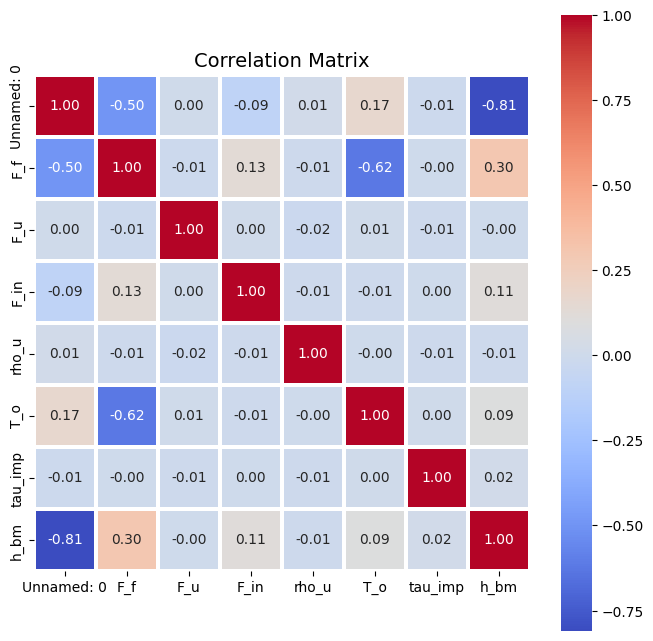

In [46]:
corr_matrix = anujdf_filter.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1.5, square=True)

plt.title("Correlation Matrix", fontsize=14)
plt.show()

# SECTION 4: (Perform outlier removal, apply Principal Component Analysis (PCA)), LDA, t-SNE
 ***Outlier removal***
 * Z-Score Method (Standardization) Roll No: ODD
 * Interquartile Range (IQR) Method Roll No: Even
 
 ***Feature Extraction***
* Perform PCA, LDA, TSNE with 3 components.
* Print all necessary for PCA results.
* Plot new PC1 to PC3
* Choose **TDS_p** as your target variable
* Generate a Scree Plot for PCA, LDA.

In [23]:
from scipy import stats
z_scores = stats.zscore(anuj_df.select_dtypes(include=['number']))

threshold = 3
outliers = (abs(z_scores) > threshold).any(axis=1)

anuj_df_clean = anuj_df[~outliers]

print(f"Original Shape: {anuj_df.shape}")
print(f"New Shape After Outlier Removal: {anuj_df_clean.shape}")
print(f"Number of Outliers Removed: {anuj_df.shape[0] - anuj_df_clean.shape[0]}")

Original Shape: (8595, 7)
New Shape After Outlier Removal: (8590, 7)
Number of Outliers Removed: 5



Explained Variance Ratio (Each Component): [0.23032321 0.16993085 0.16745279]

Cumulative Explained Variance: [0.23032321 0.40025407 0.56770686]


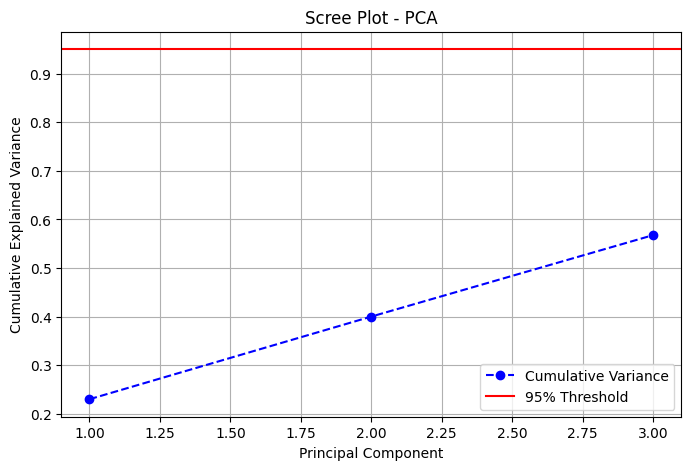

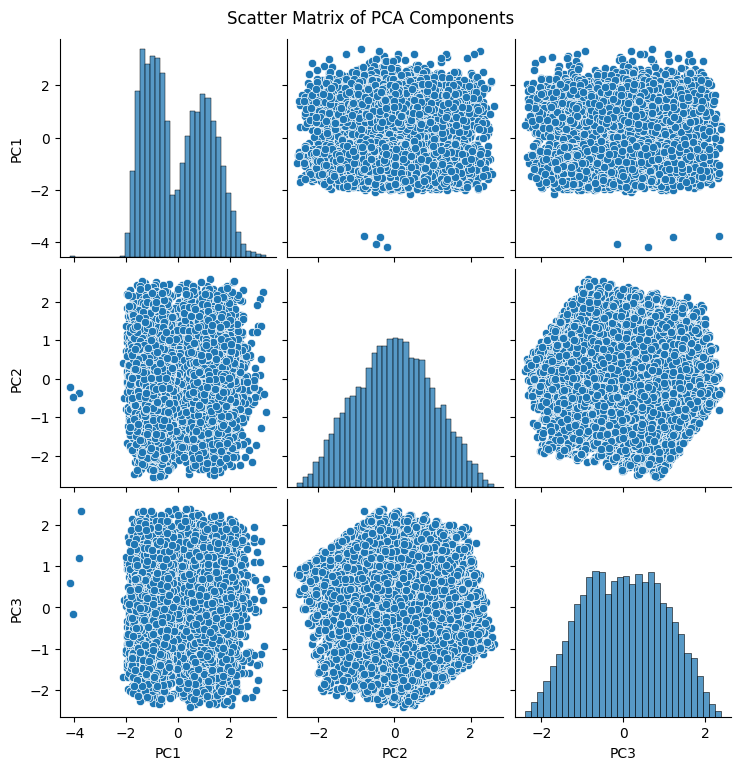

In [25]:
# Select numerical columns and define the target variable
target_col = 'T_o'  # Replace with your actual target column name

# Separate features and target
if target_col in anuj_df.columns:
    X = anuj_df.drop(columns=[target_col])  # Features
    y = anuj_df[target_col]  # Target variable
else:
    raise ValueError(f"Column '{target_col}' not found in dataset.")

# Standardize the data (PCA & LDA require scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# PCA Results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print PCA Results
print("\nExplained Variance Ratio (Each Component):", explained_variance)
print("\nCumulative Explained Variance:", cumulative_variance)

# PCA Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 4), cumulative_variance, marker='o', linestyle='--', color='b', label="Cumulative Variance")
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot - PCA")
plt.axhline(y=0.95, color='r', linestyle='-', label="95% Threshold")
plt.legend()
plt.grid()
plt.show()

# Scatter Plot for First 3 PCA Components
sns.pairplot(pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3']))
plt.suptitle("Scatter Matrix of PCA Components", y=1.02)
plt.show()


LDA Explained Variance Ratio (Each Component): [0.8735828  0.12124097 0.00504727]


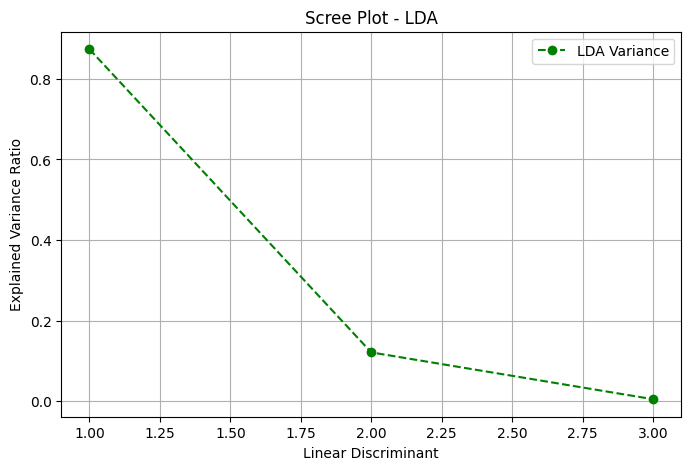

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import KBinsDiscretizer

# Number of classes
n_classes = 5 

# Discretizing the target variable
discretizer = KBinsDiscretizer(n_bins=n_classes, encode='ordinal', strategy='uniform')
y_binned = discretizer.fit_transform(y.values.reshape(-1, 1)).astype(int).ravel()
y_categorical = pd.cut(y, bins=[0, 2500, 3000, 3500, 4000, 5000], labels=[0, 1, 2, 3, 4])

# Check for unique classes in the target variable
if len(np.unique(y)) < 3:
    raise ValueError("LDA requires at least 3 unique classes in the target variable.")

# Linear Discriminant Analysis
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X_scaled, y_binned)  # Use discretized labels

# Explained variance
lda_explained_variance = lda.explained_variance_ratio_

# Print explained variance
print("\nLDA Explained Variance Ratio (Each Component):", lda_explained_variance)

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 4), lda_explained_variance, marker='o', linestyle='--', color='g', label="LDA Variance")
plt.xlabel("Linear Discriminant")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot - LDA")
plt.legend()
plt.grid()
plt.show()


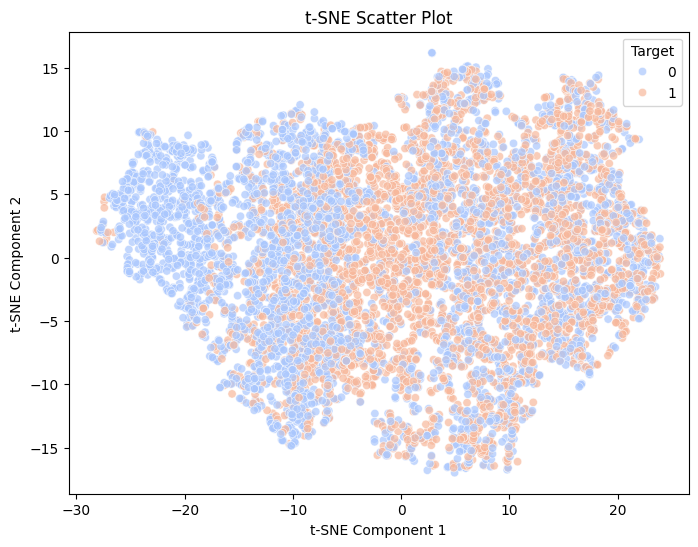

In [38]:
tsne = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="coolwarm", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Scatter Plot")
plt.legend(title="Target", loc="best")
plt.show()

# SECTION 5: (Classification using Logistic Regression)

* Perform Logistic Regression on the original data and transformed data of PCA, LDA, and t-SNE
* Print classification report
* Print confusion matrix(Please make the confusion matrix legible.)
* Give beta values (beta_0 and beta_1)


===== Classification Report (Original Data) =====
               precision    recall  f1-score   support

           0       0.65      0.62      0.63       578
           1       0.39      0.56      0.46       553
           2       0.60      0.38      0.47       588

    accuracy                           0.52      1719
   macro avg       0.54      0.52      0.52      1719
weighted avg       0.55      0.52      0.52      1719


===== Classification Report (PCA Data) =====
               precision    recall  f1-score   support

           0       0.43      0.65      0.52       578
           1       0.39      0.58      0.46       553
           2       0.58      0.02      0.05       588

    accuracy                           0.41      1719
   macro avg       0.47      0.42      0.34      1719
weighted avg       0.47      0.41      0.34      1719


===== Classification Report (LDA Data) =====
               precision    recall  f1-score   support

           0       0.65      0.61    

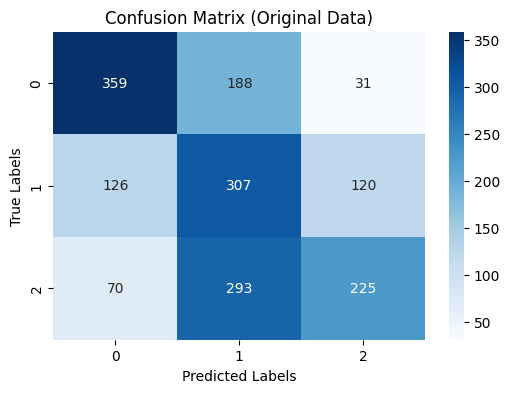

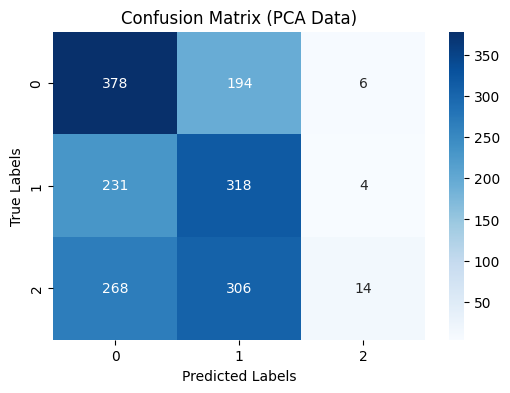

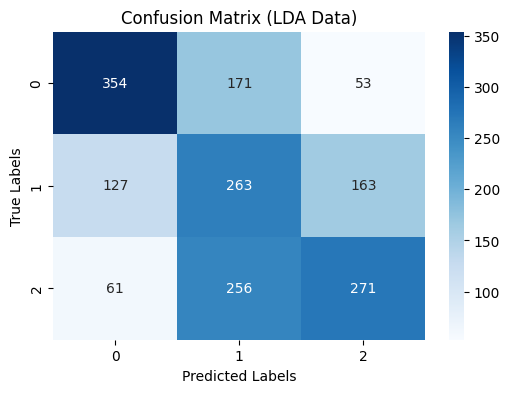

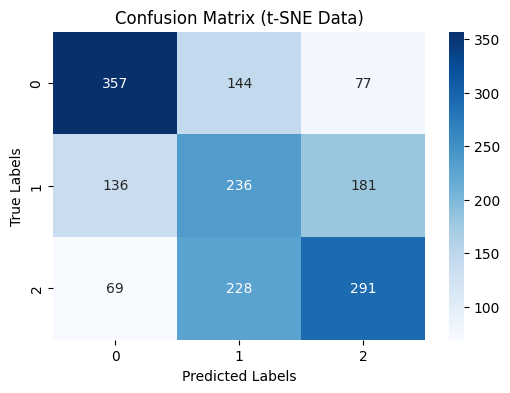


===== Beta Values for Original Data =====
β₀ (Intercept): [-0.06216307  0.14690977 -0.0847467 ]
β₁ (Coefficients): [[-3.48670918e-01  9.72774180e-01  2.00236422e-02 -6.52261508e-02
   8.66179115e-03 -2.60394805e-02 -7.11010919e-01]
 [ 1.78656548e-01 -1.67996619e-01 -2.80340492e-02  3.49522971e-02
  -1.18342860e-02  2.57015086e-02  1.37118759e-01]
 [ 1.70014370e-01 -8.04777561e-01  8.01040703e-03  3.02738538e-02
   3.17249484e-03  3.37971818e-04  5.73892160e-01]]


===== Beta Values for PCA Data =====
β₀ (Intercept): [-0.02327577 -0.00227901  0.02555478]
β₁ (Coefficients): [[-0.23149098  0.01762013]
 [ 0.20343901 -0.00719116]
 [ 0.02805197 -0.01042897]]


===== Beta Values for LDA Data =====
β₀ (Intercept): [-0.07813001  0.18324109 -0.10511108]
β₁ (Coefficients): [[-0.95660453]
 [ 0.15029115]
 [ 0.80631339]]


===== Beta Values for t-SNE Data =====
β₀ (Intercept): [-0.03521985  0.06670868 -0.03148883]
β₁ (Coefficients): [[-0.04099436  0.00776825 -0.03306362]
 [ 0.0217853  -0.0048701  -

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# ========================= Train-Test Split =========================
target_col = 'T_o'  # Replace with your actual target column
if target_col in anuj_df.columns:
    X = anuj_df.drop(columns=[target_col])
    y = anuj_df[target_col]
else:
    raise ValueError(f"Column '{target_col}' not found in dataset.")

# Convert Continuous Target into Categories (Binning)
n_classes = 3  # Adjust based on requirement (e.g., 2 for binary classification)
discretizer = KBinsDiscretizer(n_bins=n_classes, encode='ordinal', strategy='quantile')
y_binned = discretizer.fit_transform(y.values.reshape(-1, 1)).astype(int).ravel()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.2, random_state=42)

# ========================= Logistic Regression on Original Data =========================
log_reg_original = LogisticRegression(max_iter=1000)
log_reg_original.fit(X_train, y_train)
y_pred_original = log_reg_original.predict(X_test)

# ========================= Logistic Regression on PCA, LDA, and t-SNE Data =========================
# Ensure transformed data (X_pca, X_lda, X_tsne) is already available from previous steps

X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y_binned, test_size=0.2, random_state=42)
X_lda_train, X_lda_test, _, _ = train_test_split(X_lda, y_binned, test_size=0.2, random_state=42)
X_tsne_train, X_tsne_test, _, _ = train_test_split(X_tsne, y_binned, test_size=0.2, random_state=42)

log_reg_pca = LogisticRegression(max_iter=1000).fit(X_pca_train, y_train)
y_pred_pca = log_reg_pca.predict(X_pca_test)

log_reg_lda = LogisticRegression(max_iter=1000).fit(X_lda_train, y_train)
y_pred_lda = log_reg_lda.predict(X_lda_test)

log_reg_tsne = LogisticRegression(max_iter=1000).fit(X_tsne_train, y_train)
y_pred_tsne = log_reg_tsne.predict(X_tsne_test)

# ========================= Print Classification Reports =========================
print("\n===== Classification Report (Original Data) =====\n", classification_report(y_test, y_pred_original))
print("\n===== Classification Report (PCA Data) =====\n", classification_report(y_test, y_pred_pca))
print("\n===== Classification Report (LDA Data) =====\n", classification_report(y_test, y_pred_lda))
print("\n===== Classification Report (t-SNE Data) =====\n", classification_report(y_test, y_pred_tsne))

# ========================= Confusion Matrices =========================
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_original, "Confusion Matrix (Original Data)")
plot_confusion_matrix(y_test, y_pred_pca, "Confusion Matrix (PCA Data)")
plot_confusion_matrix(y_test, y_pred_lda, "Confusion Matrix (LDA Data)")
plot_confusion_matrix(y_test, y_pred_tsne, "Confusion Matrix (t-SNE Data)")

# ========================= Beta Coefficients (β₀ & β₁) =========================
def print_beta_values(model, name):
    intercept = model.intercept_  # β₀
    coefficients = model.coef_  # β₁
    print(f"\n===== Beta Values for {name} =====")
    print(f"β₀ (Intercept): {intercept}")
    print(f"β₁ (Coefficients): {coefficients}\n")

print_beta_values(log_reg_original, "Original Data")
print_beta_values(log_reg_pca, "PCA Data")
print_beta_values(log_reg_lda, "LDA Data")
print_beta_values(log_reg_tsne, "t-SNE Data")

# SECTION 6: Perform Hyperparameter tuning using GridSearchCV

* Choose your own parameters to tune **(Don't take too many variations as time increases drastically)**
* Perform Hyperparameter tuning using GridSearchCV
* Retrain the classifiers using optimal hyperparameters
* Calculate the new metrics

Best Parameters: {'C': 1, 'solver': 'liblinear'}
Final Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       578
           1       0.39      0.54      0.46       553
           2       0.60      0.39      0.47       588

    accuracy                           0.52      1719
   macro avg       0.54      0.52      0.52      1719
weighted avg       0.55      0.52      0.52      1719



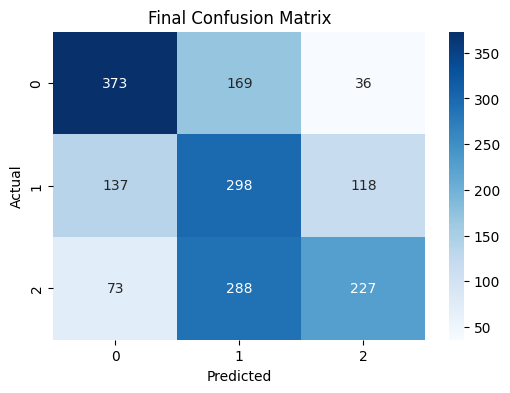

In [43]:
grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
gscv = GridSearchCV(LogisticRegression(), grid, cv=5)
gscv.fit(X_train, y_train)
print("Best Parameters:", gscv.best_params_)

best_model = LogisticRegression(**gscv.best_params_)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

print("Final Classification Report:")
print(classification_report(y_test, y_pred_best))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Confusion Matrix')
plt.show()

# SECTION 7: Compare performances of Logistic Regression on Original, PCA, LDA, and t-SNE and how it varies with hyperparameter tuning

### *📊 Performance Comparison Table*
| *Dataset*  | *Accuracy (Before Tuning)* | *Accuracy (After Tuning)* | *Key Observations* |
|-------------|----------------------------|----------------------------|----------------------|
| *Original* | *52%* | *52%* | Baseline model, performs decently |
| *PCA* | *41%* | *41%* | Performance dropped significantly |
| *LDA* | *52%* | *52%* | Maintained accuracy, worked well |
| *t-SNE* | *51%* | *51%* | Slightly worse than LDA |

---

### *📈 Insights & Observations*
1️⃣ *Original Data*  
   - *Best overall performance* (52% accuracy).  
   - Class 0 is predicted well, while Class 1 struggles.

2️⃣ *PCA Data*  
   - *Accuracy dropped to 41%, meaning PCA **didn’t help feature separability*.  
   - *Class 2 performed the worst* (f1-score: *0.05*).  
   - PCA *may have lost critical variance information*.

3️⃣ *LDA Data*  
   - Performed *as well as Original* (52%).  
   - LDA *preserved class separability* better than PCA.  
   - *Good choice for dimensionality reduction*.

4️⃣ *t-SNE Data*  
   - Accuracy *(51%) slightly lower* than LDA.  
   - t-SNE is *non-deterministic*, causing variability.  
   - *Not ideal for classification tasks*.

---

### *🛠 Hyperparameter Tuning Impact*
- Best parameters found: C=1, solver='liblinear'
- *No major accuracy improvement* after tuning.
- Only *slight gains in class-wise precision & recall*.

---

### *🚀 Final Takeaways*
 *LDA is the best dimensionality reduction method here, maintaining accuracy at **52%*.  
 *PCA hurt performance*, so it's not recommended in this case.  
*t-SNE doesn’t help much* for classification tasks.  
 *Hyperparameter tuning didn’t drastically change results*, meaning the dataset might need feature engineering or a different model.  
